In [1]:
import numpy as np 
import nibabel as nib 
import matplotlib.pyplot as plt 
import nilearn.plotting as niplt
%matplotlib inline 
import os 
import seaborn as sns 
from scipy.special import softmax 
from scipy.stats import ttest_rel
import pandas as pd 

In [2]:
#excluded 296 (less <25% comprehension score)
#Temporary exclusion: 'sub-292', 'sub-311', 'sub-267', 'sub-295', 'sub-305', 'sub-274' 
black_subs=['sub-300', 'sub-304', 'sub-293', 'sub-273', 'sub-265', 'sub-307', 'sub-283', 'sub-275', 
'sub-291', 'sub-297', 'sub-303', 'sub-294', 'sub-286', 'sub-282', 'sub-310', 'sub-302', 'sub-312', 
'sub-301', 'sub-287', 'sub-298', 'sub-313', 'sub-285', 'sub-290', 'sub-288', 'sub-281', 'sub-276', 'sub-277', 'sub-299', 'sub-308',
'sub-272', 'sub-284', 'sub-289', 'sub-280', 'sub-309', 'sub-306', 'sub-127', 'sub-279', 
'sub-315', 'sub-314','sub-292', 'sub-311', 'sub-267', 'sub-295', 'sub-305', 'sub-274'] 
slumlordreach_subs=['sub-145', 'sub-143', 'sub-016', 'sub-142', 'sub-141', 'sub-133', 'sub-140', 'sub-136', 
'sub-084', 'sub-135', 'sub-137', 'sub-138', 'sub-111', 'sub-106', 'sub-134', 'sub-132', 'sub-144']
rois=['PostTemp','AntTemp','AngG','IFG','MFG','IFGorb','vmPFC','dmPFC','PMC','HG','V1']

In [3]:
decoding_black=np.load('data/decoding_results_indiv_bert-base-uncased_black_logistic_5_5_train_balanced_score_balanced_nested_liblinear.npz')
decoding_slumlord=np.load('data/decoding_results_indiv_bert-base-uncased_slumlordreach_logistic_5_5_train_balanced_score_balanced_nested_liblinear.npz')
dependencies=['prep','pobj','det','nsubj','amod','dobj','advmod','aux','poss','ccomp','mark','prt']

In [4]:
dependency_predictivity=[]
for dep in dependencies:
    idx=int(list(decoding_black['labels']).index(dep))
    black_acc=decoding_black['acc'][:,:,idx].flatten()
    idx=int(list(decoding_slumlord['labels']).index(dep))
    slum_acc=decoding_slumlord['acc'][:,:,idx].flatten()
    mean_dep_acc=np.mean([black_acc,slum_acc],axis=0)
    dependency_predictivity.append(mean_dep_acc)
dependency_predictivity=np.asarray(dependency_predictivity)
dependency_predictivity.shape 

(12, 144)

In [3]:
results=[]
for story in ['black','slumlordreach']:
    results_story=[]
    if story=='black':
        subs=black_subs
    if story=='slumlordreach':
        subs=slumlordreach_subs
    result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding_headwise/"
    
    for sub in subs:
        if os.path.exists(result_dir+sub+"_parcelwise_results.npy"):
            #results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
            #noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
            results_sub_parcels=np.arctanh(np.load(result_dir+sub+"_parcelwise_results_banded_ridge.npy"))
            print(results_sub_parcels.shape)
            noise_ceiling_parcels=np.arctanh(np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy'))
            for head in range(144):
                results_sub_parcels[:,head]=(results_sub_parcels[:,head]/noise_ceiling_parcels)*100.0
            results_story.append(results_sub_parcels)
    results_story=np.asarray(results_story)
    results.append(results_story)
results=np.concatenate(results,axis=0)
results[np.isnan(results)]=0.0

(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)
(1000, 144)


In [6]:
results.shape 
np.save('headwise_brain_encoding_parcels.npy',results)
results.shape 

(62, 1000, 144)

In [10]:
dep_distance_black=np.load('data/dep_dist_freq_all_black.npz')
dep_distance_black=[dep_distance_black[dep].mean() for dep in dependencies]

dep_distance_slumlord=np.load('data/dep_dist_freq_all_slumlordreach.npz')
dep_distance_slumlord=[dep_distance_slumlord[dep].mean() for dep in dependencies]

dep_distance=np.mean([dep_distance_slumlord,dep_distance_black],axis=0)

In [11]:
dependency_predictivity.argmax(axis=1)

array([10,  3, 24, 24, 33, 70, 10, 13, 60, 58, 81, 24])

In [8]:

def bootstrap_pvalue(x):
    m=np.median(x)
    x=x-m
    boots=[] 
    for _ in range(1000):
        samp=np.concatenate([np.random.choice(x[:45],size=len(x[:45]),replace=True),np.random.choice(x[45:],size=len(x[45:]),replace=True)])
        boots.append(np.median(samp))
    if np.sum(boots>=m)==0:
        return 1.0/1000.0
    else:
        return np.sum(boots>=m)/1000.0
def p_adjust_bh(p):
    """Benjamini-Hochberg p-value correction for multiple hypothesis testing."""
    p = np.asfarray(p)
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig] 

parcellation_nii=nib.load('/jukebox/griffiths/bert-brains/black_data/Schaefer1000_3mm.nii.gz')
parcellation=parcellation_nii.get_fdata().astype('int')
def make_volume(results_head):
    p_values=np.zeros((1000,))
    for parcel in range(1000):
        p_values[parcel]=bootstrap_pvalue(results_head[:,parcel])
    p_values=p_adjust_bh(p_values)
    mean_results=np.median(results_head,axis=0)
    mean_results[p_values>.05]=0.0 
    volume=np.zeros(parcellation.shape)
    for p in range(1000):
        volume[parcellation==p+1]=mean_results[p]
    return volume 

for i in [4, 7, 8, 2, 11, 3, 1, 0, 6, 5, 10, 9]:
    dep=dependencies[i] 
    head=dependency_predictivity.argmax(axis=1)[i]
    head_label=str(head//12+1)+"-"+str(head-(head//12)*12+1)
    print(dep)
    volume=make_volume(results[:,:,head])
    #title=dep+" ("+head_label+"), "+str(np.round(dep_distance[i],2))
    
    niplt.plot_glass_brain(nib.Nifti1Image(volume,parcellation_nii.affine),colorbar=True,display_mode='lyrz',vmax=25,output_file="head_dep_comparison_figure/"+dep+"_"+head_label+"_brains.svg")


amod
aux
poss
det
prt
nsubj
pobj
prep
advmod
dobj
mark
ccomp


In [9]:
clark_heads=[12*7+9,12*7+10,12*6+5,12*3+9,12*8+5,12*4+3]
titles=['Direct Object','Noun Modifiers','Posessive Pronouns','Auxillary Verbs','Prepositions','Coreference']
for i in range(len(clark_heads)):
    print(titles[i])
    head=clark_heads[i]
    head_label=str(head//12+1)+"-"+str(head-(head//12)*12+1)
    volume=make_volume(results[:,:,head])
    title=titles[i]+" ("+head_label+")"

    niplt.plot_glass_brain(nib.Nifti1Image(volume,parcellation_nii.affine),title=title,colorbar=True,display_mode='lyrz',vmax=25,output_file="clark_head_figures/"+titles[i]+"_"+head_label+"_brains.svg")


Direct Object
Noun Modifiers
Posessive Pronouns
Auxillary Verbs
Prepositions
Coreference


In [10]:

def get_result_dependency_encoding(dependency):
    results=[]
    for story in ['black','slumlordreach']:
        results_story=[]
        if story=='black':
            subs=black_subs
        if story=='slumlordreach':
            subs=slumlordreach_subs
        result_dir='/jukebox/griffiths/bert-brains/results/'+story+"/encoding-"+dependency+"/"
        
        for sub in subs:
            if os.path.exists(result_dir+sub+"_parcelwise_results.npy"):
                #results_sub_parcels=np.load(result_dir+sub+"_parcelwise_results.npy")
                #noise_ceiling_parcels=np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy')
                results_sub_parcels=np.arctanh(np.load(result_dir+sub+"_parcelwise_results_banded_ridge.npy")[:,3])
                #print(results_sub_parcels.shape)
                noise_ceiling_parcels=np.arctanh(np.load('/jukebox/griffiths/bert-brains/'+story+"_data/isc/"+sub+'.npy'))
                results_sub_parcels=(results_sub_parcels/noise_ceiling_parcels)*100.0
                results_story.append(results_sub_parcels)
        results_story=np.asarray(results_story)
        results.append(results_story)
    results=np.concatenate(results,axis=0)
    results[np.isnan(results)]=0.0
    return results 

In [11]:
results=np.asarray([get_result_dependency_encoding(d) for d in dependencies])

In [12]:
def bootstrap_pvalue(x):
    m=np.median(x)
    x=x-m
    boots=[] 
    for _ in range(1000):
        samp=np.concatenate([np.random.choice(x[:45],size=len(x[:45]),replace=True),np.random.choice(x[45:],size=len(x[45:]),replace=True)])
        boots.append(np.median(samp))
    if np.sum(boots>=m)==0:
        return 1.0/1000.0
    else:
        return np.sum(boots>=m)/1000.0
def p_adjust_bh(p):
    """Benjamini-Hochberg p-value correction for multiple hypothesis testing."""
    p = np.asfarray(p)
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig] 

parcellation_nii=nib.load('/jukebox/griffiths/bert-brains/black_data/Schaefer1000_3mm.nii.gz')
parcellation=parcellation_nii.get_fdata().astype('int')
def make_volume(results_head):
    p_values=np.zeros((1000,))
    for parcel in range(1000):
        p_values[parcel]=bootstrap_pvalue(results_head[:,parcel])
    p_values=p_adjust_bh(p_values)
    mean_results=np.median(results_head,axis=0)
    mean_results[p_values>.05]=0.0 
    volume=np.zeros(parcellation.shape)
    for p in range(1000):
        volume[parcellation==p+1]=mean_results[p]
    return volume 
for i in [4, 7, 8, 2, 11, 3, 1, 0, 6, 5, 10, 9]:
    dep=dependencies[i] 
    print(dep)
    volume=make_volume(results[i])
    title=dep+"_encoding"
    niplt.plot_glass_brain(nib.Nifti1Image(volume,parcellation_nii.affine),title=title,colorbar=True,display_mode='lyrz',vmax=25,output_file="head_dep_comparison_figure/"+title+".svg")

amod
aux
poss


/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


det
prt
nsubj
pobj
prep
advmod
dobj
mark
ccomp


In [30]:
results_head=results[0]
p_values=np.zeros((1000,))
for parcel in range(1000):
    p_values[parcel]=bootstrap_pvalue(results_head[:,parcel])
    print(parcel,np.median(results_head[:,parcel]),p_values[parcel])
p_values=p_adjust_bh(p_values)
mean_results=np.median(results_head,axis=0)
mean_results[p_values>.05]=0.0 
volume=np.zeros(parcellation.shape)
for p in range(1000):
    volume[parcellation==p+1]=mean_results[p]

0 10.707021556333629 0.07
1 8.519714523047295 0.097
2 14.044720622224625 0.001
3 5.100686270778571 0.035
4 6.913971079608695 0.047
5 13.674552367320482 0.001
6 4.94022710783057 0.069
7 11.26330265504852 0.07
8 5.803245903021006 0.123
9 5.364078026087627 0.21
10 0.455163005326783 0.365
11 5.235245620936626 0.362
12 3.1749145385741535 0.42
13 6.173296889585599 0.259
14 11.912991984190318 0.001
15 10.883330328680007 0.053
16 9.823738368618136 0.003
17 3.3948063890416442 0.271
18 4.509957586760992 0.301
19 0.5060135994678988 0.458
20 4.438831771741935 0.246
21 -0.644575421122592 0.553
22 9.823970660543466 0.047
23 -0.4936489282196332 0.515
24 1.3206404509018588 0.336
25 -0.7302797001250603 0.576
26 4.77541006055769 0.446
27 4.80419117385036 0.228
28 2.46238617229129 0.355
29 1.6110635503584667 0.404
30 6.369612992604431 0.087
31 0.39141364260184136 0.44
32 8.205662597052067 0.006
33 12.668563891782599 0.007
34 -5.232741974015996 0.763
35 1.5225222052727907 0.378
36 4.117868911248779 0.267


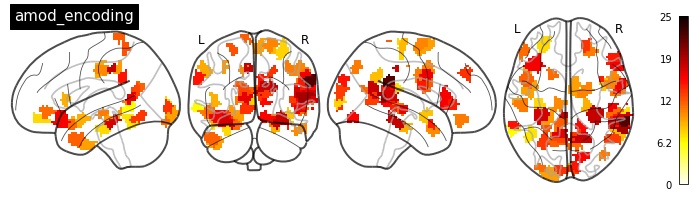

In [36]:
niplt.plot_glass_brain(nib.Nifti1Image(volume,parcellation_nii.affine),title=title,colorbar=True,display_mode='lyrz',vmax=25)